In [3]:
# Imports and SNN Setup

from pathlib import Path
import sys

# Make parent folder (neuromorphic_project) importable BEFORE importing forest_fire_snn
PROJECT_ROOT = Path("..").resolve()
sys.path.append(str(PROJECT_ROOT))

import numpy as np
import torch
import matplotlib.pyplot as plt
from forest_fire_snn import SNN

net = SNN()
model_path = PROJECT_ROOT / "trained_snn_model.pth"   # points to neuromorphic_project/trained_snn_model.pth
net.load_state_dict(torch.load(model_path, map_location="cpu"))
net.eval()
print("Trained model loaded successfully.")




Trained model loaded successfully.


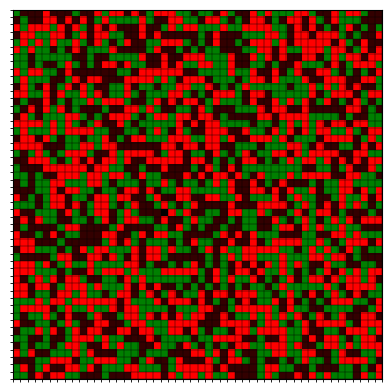

Node Coordinate: (20,22)


(array([[1, 1, 0, ..., 2, 1, 2],
        [1, 2, 0, ..., 1, 0, 2],
        [0, 0, 0, ..., 2, 1, 0],
        ...,
        [2, 1, 2, ..., 1, 0, 1],
        [0, 1, 0, ..., 0, 0, 0],
        [1, 0, 0, ..., 1, 0, 0]], shape=(50, 50), dtype=int32),
 (20, 22))

In [ ]:
# World Generation Kernel

import numpy as np
import random
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def generate_world(N, node_x_max=None, node_y_max=None):
    # 0,1,2 randomly for every pixel (3 possible "colors/states")
    array = np.random.randint(0, 3, size=(N, N))

    # choose node position (defaults to full grid if max not given)
    if node_x_max is None: node_x_max = N - 1
    if node_y_max is None: node_y_max = N - 1

    x = random.randint(0, min(node_x_max, N - 1))
    y = random.randint(0, min(node_y_max, N - 1))

    # set node cell to a special value (3) which will be black
    array[y, x] = 3

    # map values -> colors: 0,1,2 are your random colors; 3 is node black
    colors_list = [
        (0.2, 0.0, 0.0),  # color for value 0
        (0.0, 0.5, 0.0),  # color for value 1
        (1.0, 0.0, 0.0),  # color for value 2
        (0.0, 0.0, 0.0)   # color for value 3 (node) = black
    ]
    cmap = mcolors.ListedColormap(colors_list)
    
    def forest_function(list, x_max, y_max):
        forest_state_count = 0
        
        # Repeat until 70% of world is forest
        while forest_state_count < math.ciel((0.7 * (x_max-1 * y_max-1))):
            # Randomly choose an empty coordinate to make a "tree center"
            p_x = random.randint(0, x_max-1)
            p_y = random.randint(0, y_max-1)
            p = (p_x, p_y)
            # make sure random point for p is not the same as the black SNN node
            if p[0] == x:
                while p[0] == x:
                    p[0] = random.randint(0, x_max-1)
            if p[0] == x:
                while p[1] == y:
                    p[0] = random.randint(0, y_max-1)
            
            
            
            
    plt.imshow(array, origin="lower", extent=[0, N, 0, N],
               interpolation="nearest", cmap=cmap, vmin=0, vmax=3)

    ax = plt.gca()
    ax.set_aspect("equal")
    ax.set_xticks(np.arange(0, N+1, 1), minor=True)
    ax.set_yticks(np.arange(0, N+1, 1), minor=True)
    ax.grid(which="minor", color="black", linewidth=0.3)
    ax.set_xticks([])
    ax.set_yticks([])

    plt.show()

    print(f"Node Coordinate: ({x},{y})")
    return array, (x, y)

# Example
generate_world(50)



In [ ]:
# Spread Algorithm Function --> Based on time steps
def fire_spread():
    

In [ ]:
# Build Graphs Functions

In [ ]:
# Final Sim